# Import Library dan Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

### Deskripsi

Akses ke air minum yang aman sangat penting untuk kesehatan, hak asasi manusia dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai masalah kesehatan dan pembangunan di tingkat nasional, regional dan lokal. Di beberapa daerah, telah terbukti bahwa investasi dalam penyediaan air dan sanitasi dapat menghasilkan keuntungan ekonomi bersih, karena pengurangan efek kesehatan yang merugikan dan biaya perawatan kesehatan lebih besar daripada biaya melakukan intervensi.

In [ ]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Kita bisa melihat dalam dataset kita.
kita memiliki 3276 baris dengan 10 kolom, disana terdapat beberapa kandungan dalam air seperti PH, Hardness, Solids, Chloramines, dll.

Nilai pada kandungan tersebut merepresentasikan seberapa bagus air tersebut untuk bisa di minum oleh manusia, seperti penjelasa pada kolom Potability. Angka 1 mengartikan bisa untuk di minum sedangkan 0 tidak bisa.

In [ ]:
# Kita akan mengecek dataset tersebut dengan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Dari data di atas kita memiliki data bertipe Float, dan satu data tipe interger yang mengindentifikasikan 0 dan 1.

terdapat 10 kolom, 9 kolom bertipe Float dan 1 bertipe Int.

In [ ]:
# kita juga akan mengecek deskripsi dari data tersebut menggunakan fungsi describe()
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Terlihat jelas deskripsi data kita di atas.

Count : jumlah sample dalam data

mean : jumlah rata-rata

std : nilai standard deviasi

min : nilai minimum

25% : nilai kuartil pertama

50% : nilai kuartil kedua

75% : nilai kuartil ketiga

max : nilai maxsimmum

# Missing Value

### Mengatasi Nilai bernilai 0

Pada fungsi describe sebelumnya kita melihat pada kolom PH terdapat nilai minimum dengan nilai 0, kita tidak ingin ada nilai 0 pada data kita karena akan mengganggu pada saat pelatihan nanti. 

Jadi kita akan mengatasinya dengan menghilangkan baris dengan nilai min 0 pada kolom PH.

Namun kita tidak akan menghilangkan min 0 pada kolom Target kita, karena itu yang akan menjadi tolak ukur kualitas air yang bisa di minum.

In [ ]:
PH = (df.ph == 0).sum()
print('Nilai 0 pada kolom PH ada: ', PH)

Nilai 0 pada kolom PH ada:  1


In [ ]:
df.loc[(df['ph']==0)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.0,214.846144,49456.587108,7.897539,NaN,583.448849,7.702328,77.712891,4.92884,0


Hanya pada kolom PH saja yang memiliki nilai 0, namun di sana terlihat NaN yang berarti ada nilai yang kosong, dan nilai kosong berada satu baris dengan nilai 0. Jadi kita akan menghapus baris tersebut secara berbarengan.

Namun sebelum itu kita akan melihat ada berapa nilai kosong atau kolom yang tidak memiliki nilai sama sekali.

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

ph memiliki 491 nilai kosong/Nan, sulfate memuliki 781, dan terakhir Trihalomethanes memiliki 162 nilai kosong/Nan. Ada beberapa cara untuk mengatasinya namun kita akan mencoba untuk menghapusnya saja, karena ini adalah data berupa kesehatan dan data kesehatan lumayan sensitif. Jadi kami memilih untuk menghapusnya di banding mengisinya dengan nilai rata-rata.

### Menghapus baris yang mengandung nilai 0 dan Nan

In [ ]:
df = df.dropna(axis=0)

In [ ]:
# Cek berapa baris yang tersisa setelah menghapus nilai kosong dan nilai 0
df.shape

(2011, 10)

Data kita tersisa 2011, kita tidak masalah dengan pengurangan data ini. Karena sekali lagi data kesehatan itu lumayan sensitif dan berdampak pada kesehatan indifidu seseorang.

In [ ]:
PH = (df.ph == 0).sum()
print('Nilai 0 pada kolom PH ada: ', PH)

Nilai 0 pada kolom PH ada:  0


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Nilai 0 dan nilai kosong/Nan sudah tidak ada lagi, jadi data kita sudah bersih dari missing value.

# Outliers

Kita akan mendekteksi Outliers pada data kita menggunakan boxplot, boxplot merupakan fungsi bawaan dari seaborn

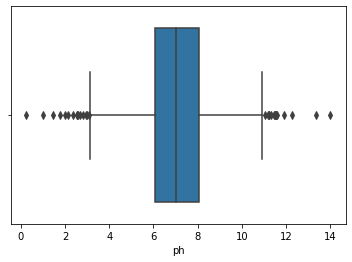

In [ ]:
sns.boxplot(x=df['ph'])

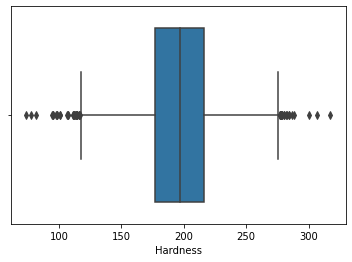

In [ ]:
sns.boxplot(x=df['Hardness'])

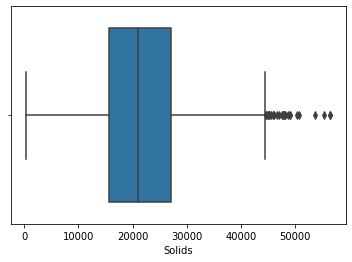

In [ ]:
sns.boxplot(x=df['Solids'])

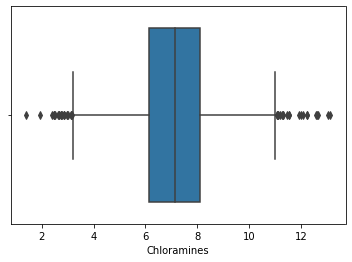

In [ ]:
sns.boxplot(x=df['Chloramines'])

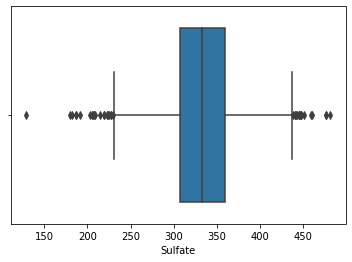

In [ ]:
sns.boxplot(x=df['Sulfate'])

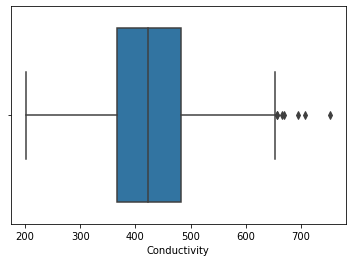

In [ ]:
sns.boxplot(x=df['Conductivity'])

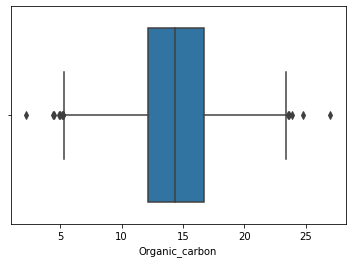

In [ ]:
sns.boxplot(x=df['Organic_carbon'])

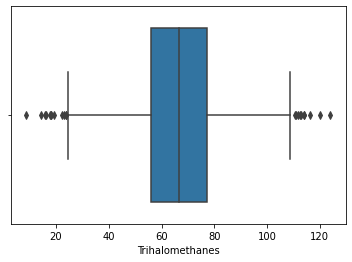

In [ ]:
sns.boxplot(x=df['Trihalomethanes'])

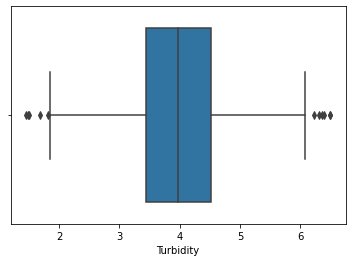

In [ ]:
sns.boxplot(x=df['Turbidity'])

Kita bisa melihat ada beberapa dari data kita terdapat Outliers, jadi kita akan menghilangkan Outliers kita dengan metode IQR atau Inter Quartile Range

### Menghapus Outliers dengan IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(1794, 10)

Dataset kita sekarang berisi 1794 baris dengan 10 kolom, oke tidak masalah mari kita lanjut ke tahap selanjutnya.

# Univariate Analysis

Univariate Analysis adalah cara kita melakukan analisis terhadap satu jenis variable

In [ ]:
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

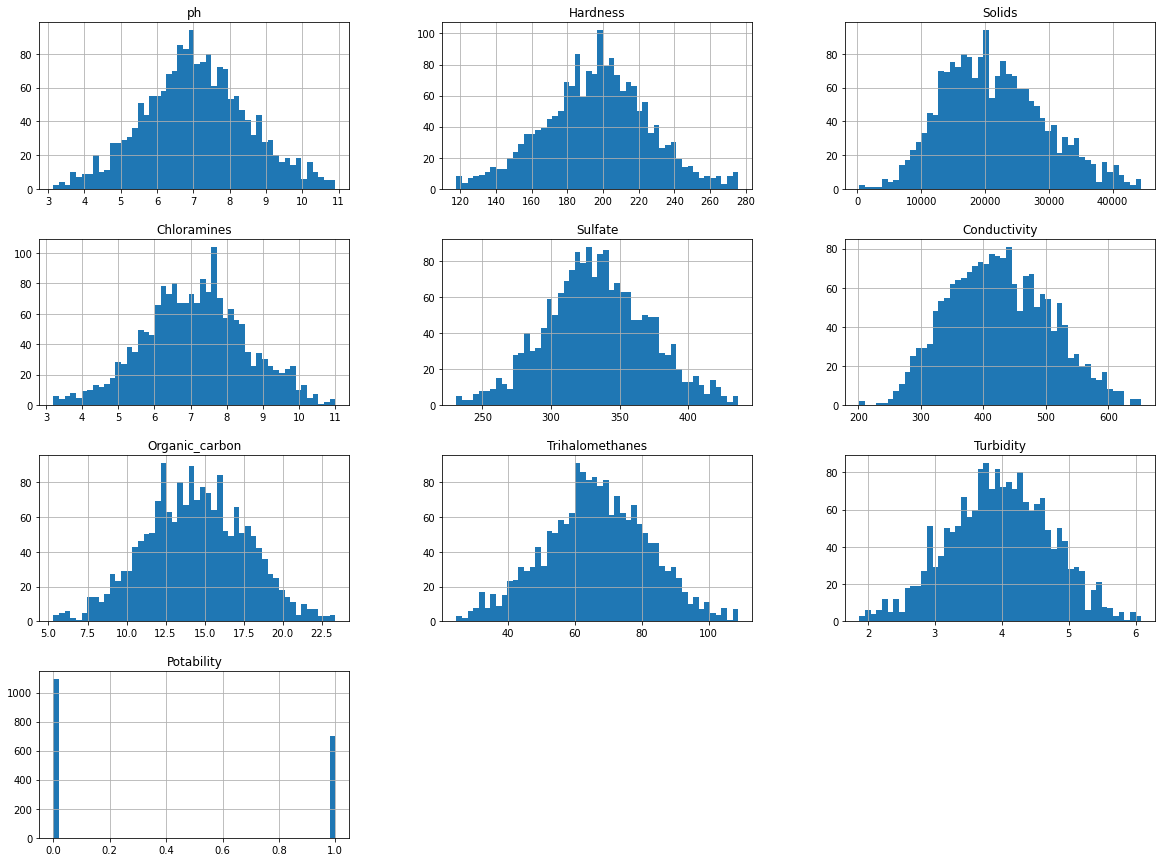

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# melihat jumlah masing masing nilai dari kolom Potability
df['Potability'].value_counts()

0    1091
1     703
Name: Potability, dtype: int64

Dari data di atas kita simpulkan
* Data air tidak layak minum lebih banyak di banding dengan layak minum.
* Jumlah Data nilai 0 memiliki sample sebanyak 1091.
* Dan jumlah Data nilai 1 memiliki sample sebanyak 703.

# Multivariate Analysis

Multivariate Analysis adalah cara kita melakukan analisis terhadap banyak variasi variabel

Untuk mengamati fitur kita adalah dengan menggunakan pairplot().

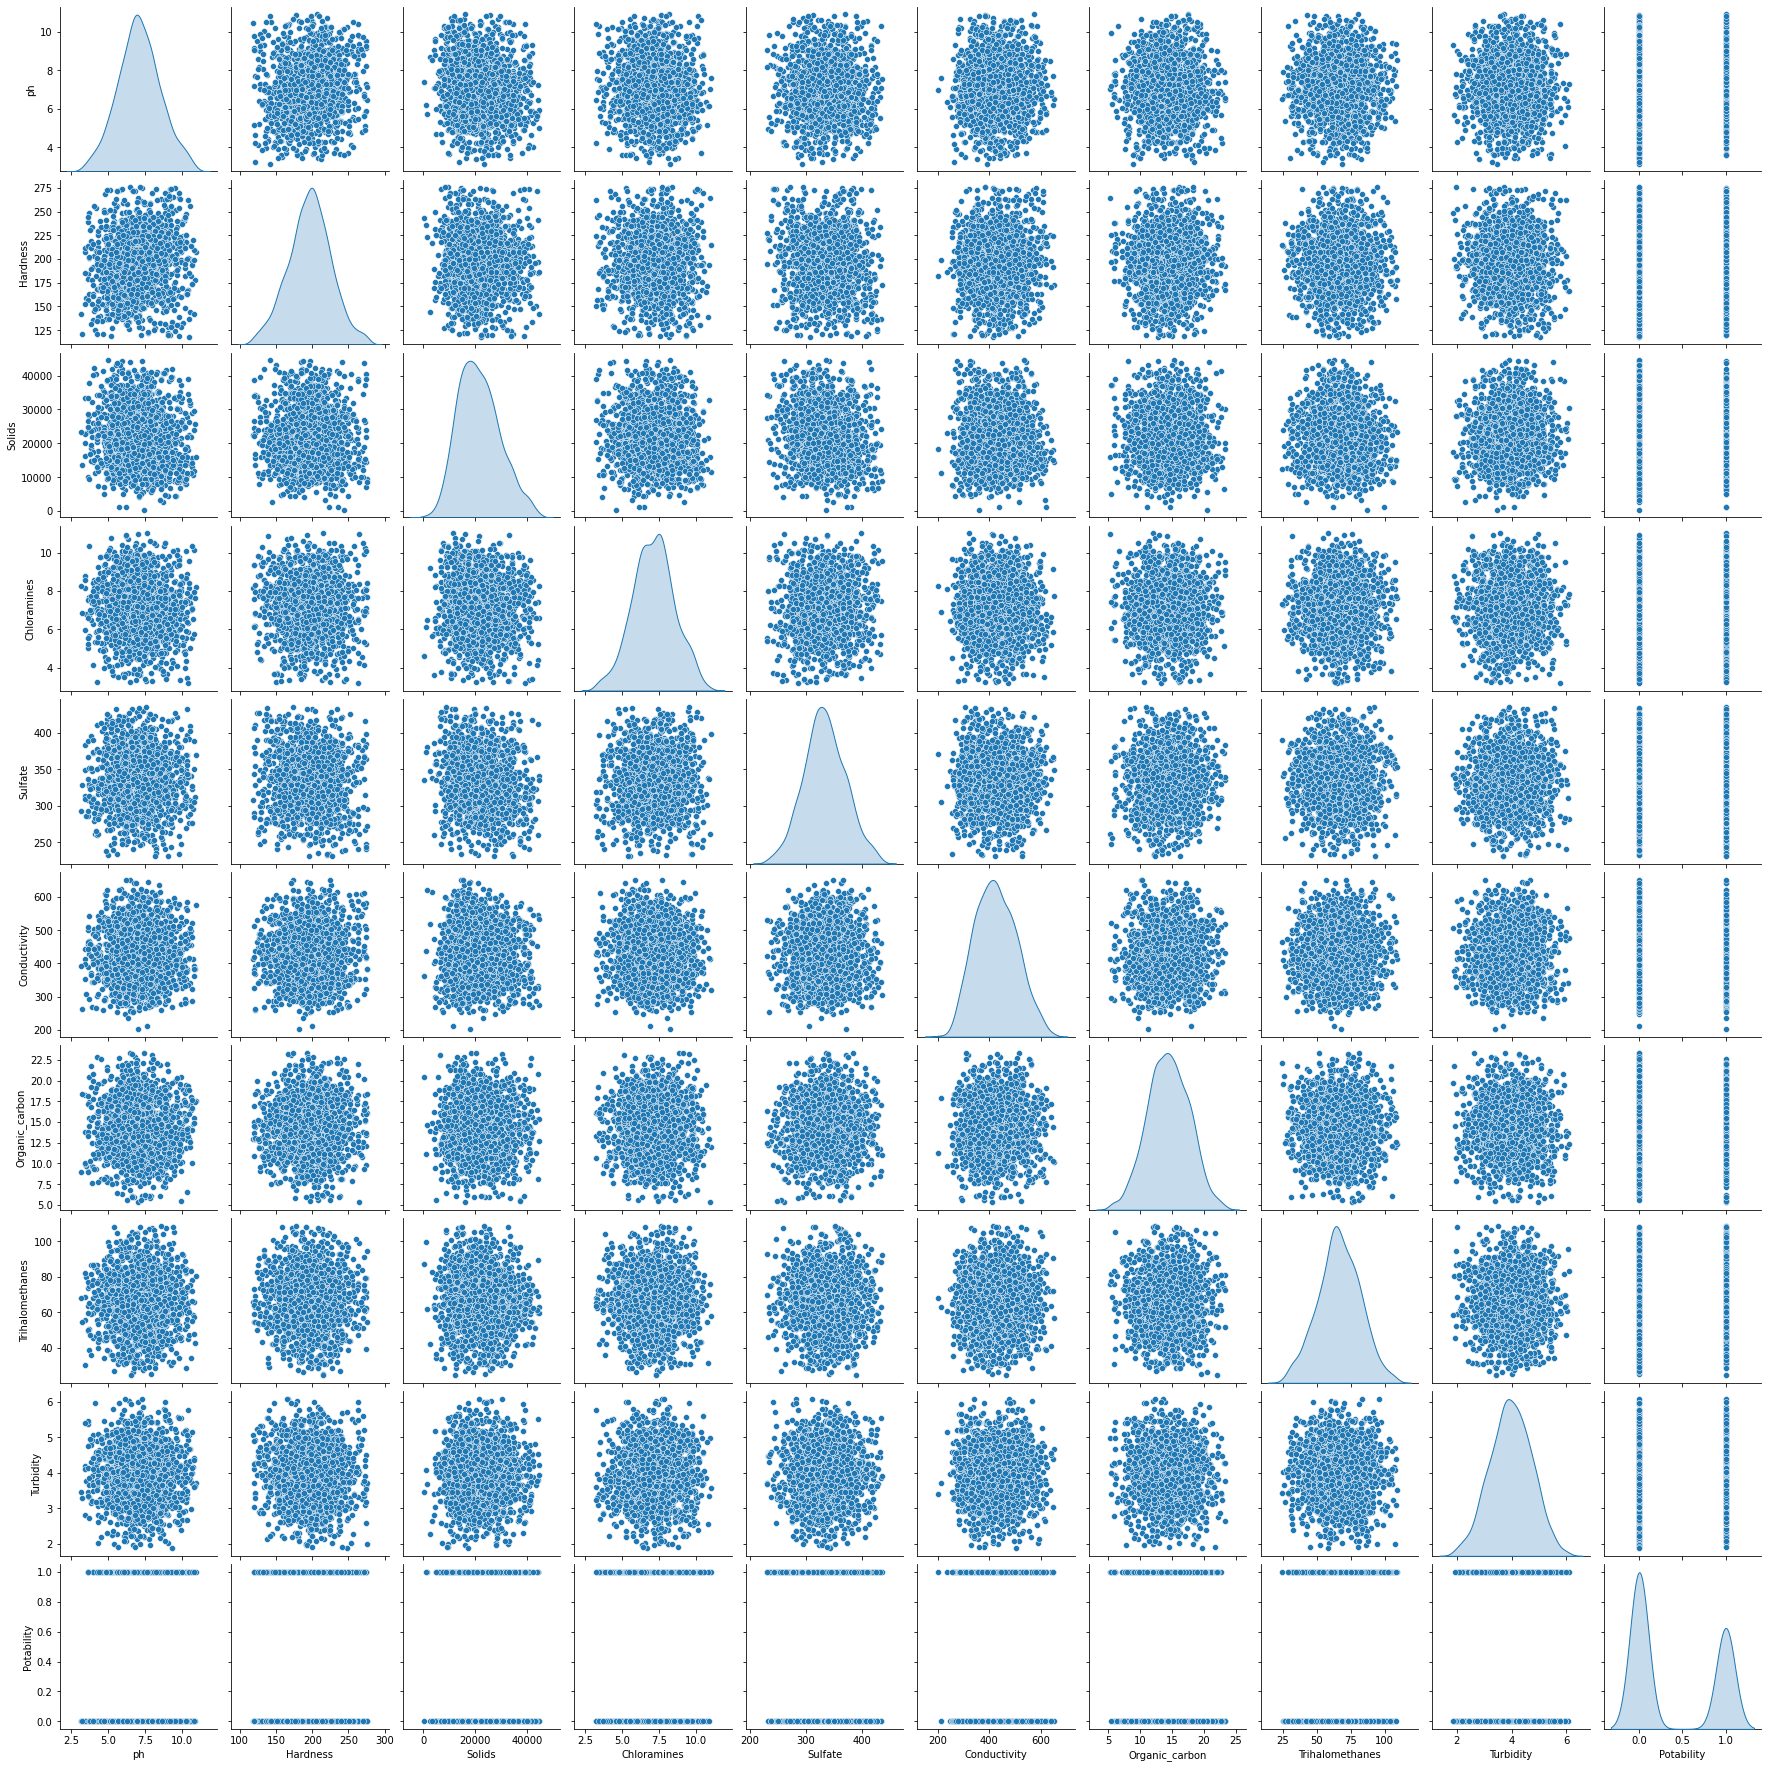

In [ ]:
# Mengamati hubungan antar fitur dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Kita bisa melihat visual di atas, fokus kita mengarah sumbu 'y' Potability. Pola grafik tampak datar seperti itu seperti tidak membentuk naik atau turun, namun karena kita sedang mencari pola pada kasus **klasifikasi** jadi pada kolom target hanya ada dua pilihan yaitu 0 atau 1.

Text(0.5, 1.0, 'Correlation Matrix')

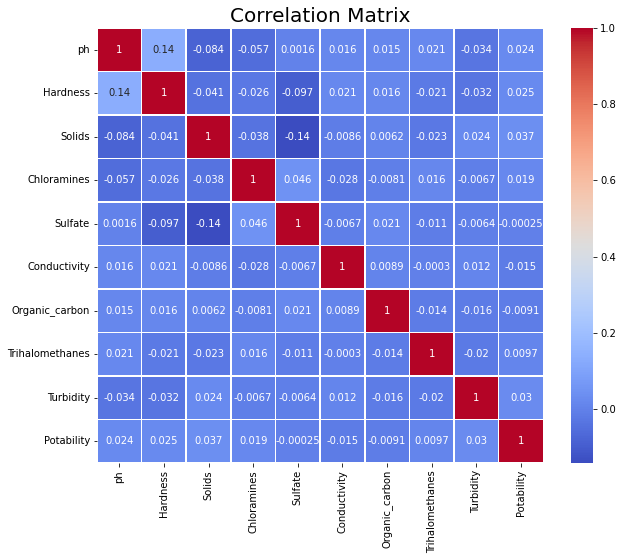

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(6)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Dari gambar di atas, sepertinya hampir tidak ada variable yang memiliki corelasi yang kuat.

# Bagi data menjadi Data latih dan Data uji

Kita akan membagi data menjadi data latih dan data uji, dan menaruh sekitar 20% untuk data uji. dengan random_state sebesar 123.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Potability'], axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1794
Total # of sample in train dataset: 1255
Total # of sample in test dataset: 539


# Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Development

Kita akan memulai proses pelatihan pada data kita, Algoritma yang akan kita gunakan antara lain:
* Random Forest
* XGBoost
* SVM

### Random Forest

Kita akan menggunakan RandomForest terlebih dahulu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Algoritma Random Forest Classifier
RF = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto', n_estimators=500, random_state = 123)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=123)

### XGBoost

Kedua kita akan menerapkan XGBoost Classifier



In [ ]:
from xgboost import XGBClassifier
# Algoritma XGBoost Classifier
XGB = XGBClassifier(booster='gbtree')
XGB.fit(X_train, y_train)

XGBClassifier()

### SVM

Dan yang terakhir kita akan menggunakan SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Algoritma SVM Classifier
clf = SVC(kernel = 'rbf', C=1, gamma=0.1, random_state = 123)
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=123)

# Evaluasi Model

Setelah sebelumnya selesai dengan melatih model, sekarang waktunya kita evaluasi model tersebut.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = RF.predict(X_test)
RF = confusion_matrix(y_test, y_pred)
print(RF)
accuracy_score(y_test, y_pred)

[[313  10]
 [170  46]]


0.6660482374768089

In [ ]:
y_pred_XGB = XGB.predict(X_test)
XGB = confusion_matrix(y_test, y_pred_XGB)
print(XGB)
accuracy_score(y_test, y_pred_XGB)

[[296  27]
 [154  62]]


0.6641929499072357

In [ ]:
y_pred_clf = clf.predict(X_test)
clf = confusion_matrix(y_test, y_pred_clf)
print(clf)
accuracy_score(y_test, y_pred_clf)

[[306  17]
 [135  81]]


0.7179962894248608

Setelah kita mencoba ketiga algoritma, SVM adalah yang memiliki nilai accuracy yang paling tinggi dengan nilai 71%. Oleh karena itu kita akan memilih Metode SVM untuk model Machine Learning Water Quality kita.
